In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading dataset
data = pd.read_csv('Flipkart/flipkart_com-ecommerce_sample_1050.csv')

In [3]:
data.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [4]:
data['product_specifications'][0]

'{"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"}, {"key"=>"Designed For", "value"=>"Door"}, {"key"=>"Type", "value"=>"Eyelet"}, {"key"=>"Model Name", "value"=>"Abstract Polyester Door Curtain Set Of 2"}, {"key"=>"Model ID", "value"=>"Duster25"}, {"key"=>"Color", "value"=>"Multicolor"}, {"key"=>"Length", "value"=>"213 cm"}, {"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 2"}, {"key"=>"Sales Package", "value"=>"2 Curtains"}, {"key"=>"Material", "value"=>"Polyester"}]}'

In [5]:
# Dropping columns
data_clean = data[['uniq_id', 'product_name', 'product_category_tree', 'image', 'description']].copy()

# Retrieving product category

In [6]:
# Total number of categories
len(data_clean['product_category_tree'].unique())

642

In [7]:
data_clean['product_category_tree'].sample()

481    ["Computers >> Laptop Accessories >> Batteries...
Name: product_category_tree, dtype: object

In [8]:
# Splitting product_category_tree
df_categ = data_clean['product_category_tree'].str.split(pat = '>>', expand = True)
df_categ.head(10)

,0,1,2,3,4,5,6
0,"[""Home Furnishing",Curtains & Accessories,Curtains,Elegance Polyester Multicolor Abstract Eyelet...,None,None,None
1,"[""Baby Care",Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels,"Sathiyas Cotton Bath Towel (3 Bath Towel, Red...",None,None
2,"[""Baby Care",Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels,Eurospa Cotton Terry Face Towel Set (20 PIECE...,None,None
3,"[""Home Furnishing",Bed Linen,Bedsheets,SANTOSH ROYAL FASHION Bedsheets,SANTOSH ROYAL FASHION Cotton Printed King siz...,None,None
4,"[""Home Furnishing",Bed Linen,Bedsheets,Jaipur Print Bedsheets,Jaipur Print Cotton Floral King sized Double ...,None,None
5,"[""Watches",Wrist Watches,"Maserati Time Wrist Watches""]",None,None,None,None
6,"[""Watches",Wrist Watches,"Camerii Wrist Watches""]",None,None,None,None
7,"[""Watches",Wrist Watches,"T STAR Wrist Watches""]",None,None,None,None
8,"[""Watches",Wrist Watches,"Alfajr Wrist Watches""]",None,None,None,None
9,"[""Watches",Wrist Watches,"TAG Heuer Wrist Watches""]",None,None,None,None


In [9]:
df_categ[0].str[:2].unique()

array(['["'], dtype=object)

In [10]:
# Dropping [] and "" characters
df_categ[0] = df_categ[0].apply(lambda x: str(x)[2:] if str(x)[:2] == '["' else x)

for c in np.arange(0,7,1):
    df_categ[c] = df_categ[c].apply(lambda x: str(x)[:-2] if str(x)[-2:] == '"]' else x)
    
df_categ.head(10)

,0,1,2,3,4,5,6
0,Home Furnishing,Curtains & Accessories,Curtains,Elegance Polyester Multicolor Abstract Eyelet...,None,None,None
1,Baby Care,Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels,"Sathiyas Cotton Bath Towel (3 Bath Towel, Red...",None,None
2,Baby Care,Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels,Eurospa Cotton Terry Face Towel Set (20 PIECE...,None,None
3,Home Furnishing,Bed Linen,Bedsheets,SANTOSH ROYAL FASHION Bedsheets,SANTOSH ROYAL FASHION Cotton Printed King siz...,None,None
4,Home Furnishing,Bed Linen,Bedsheets,Jaipur Print Bedsheets,Jaipur Print Cotton Floral King sized Double ...,None,None
5,Watches,Wrist Watches,Maserati Time Wrist Watches,None,None,None,None
6,Watches,Wrist Watches,Camerii Wrist Watches,None,None,None,None
7,Watches,Wrist Watches,T STAR Wrist Watches,None,None,None,None
8,Watches,Wrist Watches,Alfajr Wrist Watches,None,None,None,None
9,Watches,Wrist Watches,TAG Heuer Wrist Watches,None,None,None,None


In [11]:
df_categ.nunique()

0      7
1     63
2    246
3    350
4    297
5    117
6     57
dtype: int64

In [12]:
df_categ[0].unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

In [13]:
df_categ[1].sort_values().unique()

array([' Baby & Kids Gifts ', ' Baby Bath & Skin ', ' Baby Bedding ',
       ' Baby Grooming ', ' Bar & Glassware ', ' Bath Linen ',
       ' Bath and Spa ', ' Beauty Accessories ', ' Bed Linen ',
       ' Body and Skin Care ', ' Candles & Fragrances ', ' Clocks ',
       ' Coffee Mugs ', ' Combos and Kits ', ' Computer Components ',
       ' Computer Peripherals ', ' Consumables & Disposables ',
       ' Containers & Bottles ', ' Cookware ', ' Curtains & Accessories ',
       ' Cushions, Pillows & Covers ', ' Decorative Lighting & Lamps ',
       ' Diapering & Potty Training ', ' Dinnerware & Crockery ',
       ' Eye Care ', ' Feeding & Nursing ', ' Floor Coverings ',
       ' Flowers, Plants & Vases ', ' Fragrances ',
       ' Furniture & Furnishings ', ' Garden & Leisure ', ' Hair Care ',
       ' Health Care ', ' Housekeeping & Laundry ', ' Infant Wear ',
       ' JMD Home Furnishing ', ' Kitchen & Dining Linen ',
       ' Kitchen Tools ', " Kripa's Home Furnishing ",
       ' Lapt

In [14]:
# Checking whether each category 1 is associated to a single category_0
df_categ.columns = ['categ_'+str(x) for x in df_categ.columns]
df_categ['count'] = 1
s_ = df_categ.pivot_table(index = 'categ_1', columns = 'categ_0', values = 'count').sum(axis = 1)
s_[s_ != 1]

Series([], dtype: float64)

In [15]:
# Joining categ_1 in data_clean
data_clean.drop(columns = 'product_category_tree', inplace = True)
data_clean = data_clean.join(df_categ['categ_0']).copy()
data_clean = data_clean.join(df_categ['categ_1']).copy()
data_clean.rename(columns = {'categ_0' : 'category', 'categ_1' : 'subcategory'}, inplace = True)

# Product description

In [17]:
# Turning text data into 'description-token' matrix
from sklearn.feature_extraction.text import CountVectorizer
from nltk import RegexpTokenizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import re

# Initializations
tokenizer = RegexpTokenizer('[a-zA-Z]+')
stemmer = SnowballStemmer('english')
stop_words = stopwords.words('english')

# Creating tokens and list of words
data_clean['tokens'] = data_clean['description'].apply(lambda x: tokenizer.tokenize(str.lower(x)))
data_clean['words'] = data_clean['tokens'].apply(lambda x: " ".join([stemmer.stem(i) for i in x if i not in stop_words]))

# Count Vectorizer
c_vect = CountVectorizer()
X = c_vect.fit_transform(data_clean['words'])

In [18]:
# Feature names
c_vect.get_feature_names()

['aa',
 'aaa',
 'aapno',
 'aari',
 'aarika',
 'abil',
 'abkl',
 'abl',
 'abod',
 'abras',
 'abroad',
 'absolut',
 'absorb',
 'abstract',
 'abstrct',
 'ac',
 'accent',
 'access',
 'accessori',
 'accid',
 'accident',
 'accommod',
 'accomplish',
 'accord',
 'acer',
 'ach',
 'aci',
 'acid',
 'acl',
 'acn',
 'across',
 'acryl',
 'act',
 'activ',
 'actual',
 'ad',
 'adaa',
 'adapt',
 'adaptor',
 'add',
 'addict',
 'addit',
 'adf',
 'adhes',
 'adi',
 'adida',
 'adino',
 'adjust',
 'admir',
 'ador',
 'adorn',
 'adsl',
 'advanc',
 'advic',
 'advis',
 'aero',
 'affect',
 'afford',
 'afternoon',
 'agarwood',
 'age',
 'ageless',
 'agrasen',
 'agre',
 'agromech',
 'aid',
 'air',
 'airport',
 'airtel',
 'airtex',
 'airtight',
 'ajmal',
 'akada',
 'akshaj',
 'akup',
 'al',
 'alarm',
 'alcohol',
 'aleo',
 'alfajr',
 'aliv',
 'alli',
 'allin',
 'allov',
 'allow',
 'alloy',
 'alluminium',
 'allur',
 'almond',
 'almost',
 'alo',
 'aloevera',
 'along',
 'alpha',
 'alphabet',
 'alram',
 'also',
 'alter',
 

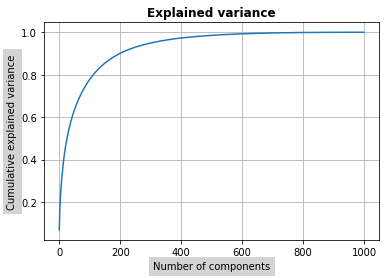

200 components explain 90.0% of variance
303 components explain 95.0% of variance
557 components explain 99.0% of variance


In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1000)
pca.fit(X.toarray())

# Explained variance
s_ = pca.explained_variance_ratio_.cumsum()
plt.plot(pca.explained_variance_ratio_.cumsum())

plt.title('Explained variance', fontweight = 'bold')
plt.xlabel('Number of components', backgroundcolor = 'lightgrey')
plt.ylabel('Cumulative explained variance', backgroundcolor = 'lightgrey')

plt.grid(True)
plt.show()

for val in [0.9, 0.95, 0.99]:
    x = len(s_[s_<val])
    print('{} components explain {}% of variance'.format(x, 100*val))

# Dimensionnality reduction

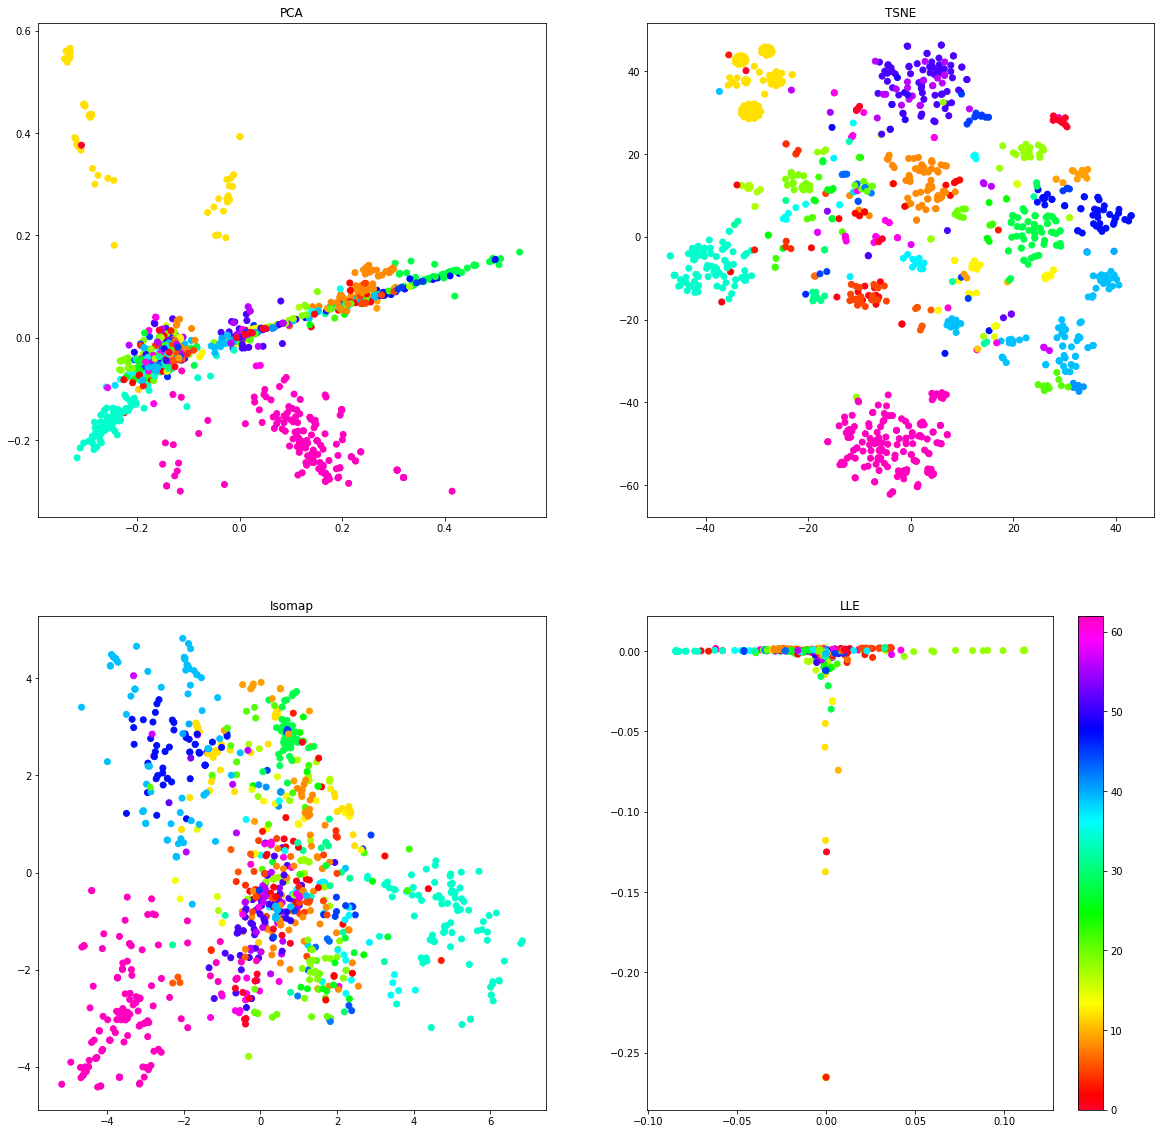

In [22]:
# Plotting several 2D projections of the tf-idf, and allocating color by subcategory
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding

# Creating tf-idf matrix
tf_idf = TfidfTransformer()
X_tfidf = tf_idf.fit_transform(X)

le_subcat = LabelEncoder()
subcats_ = le_subcat.fit_transform(data_clean['subcategory'])

# Fitting Dimensionnlaity reduction algorithms
pca = PCA(n_components = 2)
tsne = TSNE(n_components = 2)
iso = Isomap(n_components = 2)
lle = LocallyLinearEmbedding(n_components = 2)

X_tf_pca = pca.fit_transform(X_tfidf.toarray())
X_tf_tsne = tsne.fit_transform(X_tfidf)
X_tf_iso = iso.fit_transform(X_tfidf)
X_tf_lle = lle.fit_transform(X_tfidf.toarray())

# Plotting
plt.figure(figsize = (20,20))

plt.subplot(221)
plt.scatter(X_tf_pca[:,0], X_tf_pca[:,1], c = subcats_, cmap = 'gist_rainbow')
plt.title('PCA')

plt.subplot(222)
plt.scatter(X_tf_tsne[:,0], X_tf_tsne[:,1], c = subcats_, cmap = 'gist_rainbow')
plt.title('TSNE')

plt.subplot(223)
plt.scatter(X_tf_iso[:,0], X_tf_iso[:,1], c = subcats_, cmap = 'gist_rainbow')
plt.title('Isomap')

plt.subplot(224)
plt.scatter(X_tf_lle[:,0], X_tf_lle[:,1], c = subcats_, cmap = 'gist_rainbow')
plt.title('LLE')
plt.colorbar()

plt.show()

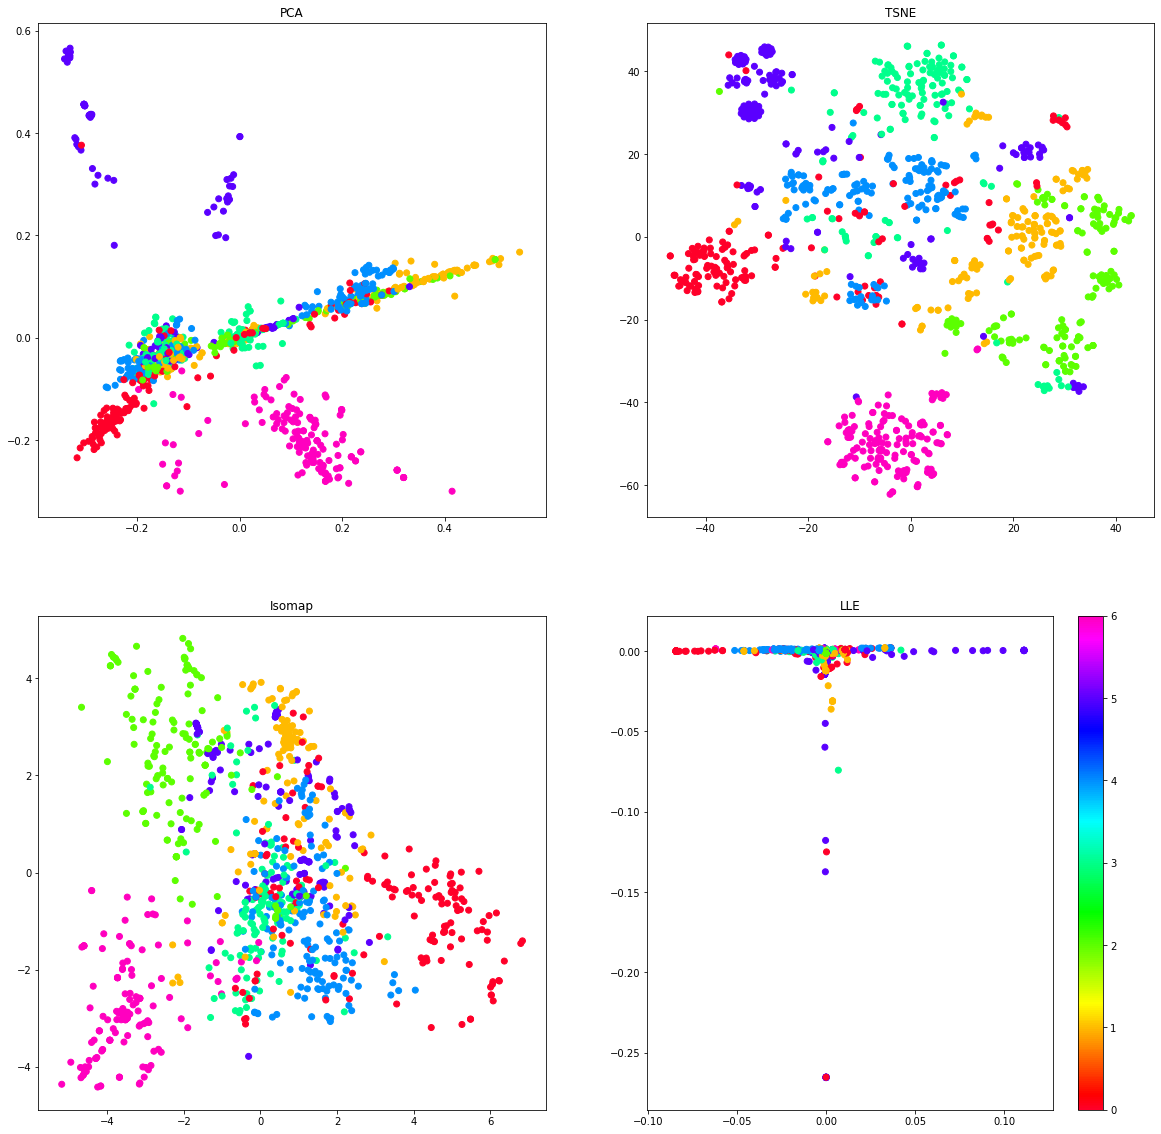

In [23]:
# Plotting with 1 color per main category
le_cat = LabelEncoder()
categs_ = le_cat.fit_transform(data_clean['category'])

plt.figure(figsize = (20,20))

plt.subplot(221)
plt.scatter(X_tf_pca[:,0], X_tf_pca[:,1], c = categs_, cmap = 'gist_rainbow')
plt.title('PCA')

plt.subplot(222)
plt.scatter(X_tf_tsne[:,0], X_tf_tsne[:,1], c = categs_, cmap = 'gist_rainbow')
plt.title('TSNE')

plt.subplot(223)
plt.scatter(X_tf_iso[:,0], X_tf_iso[:,1], c = categs_, cmap = 'gist_rainbow')
plt.title('Isomap')

plt.subplot(224)
plt.scatter(X_tf_lle[:,0], X_tf_lle[:,1], c = categs_, cmap = 'gist_rainbow')
plt.title('LLE')
plt.colorbar()

plt.show()

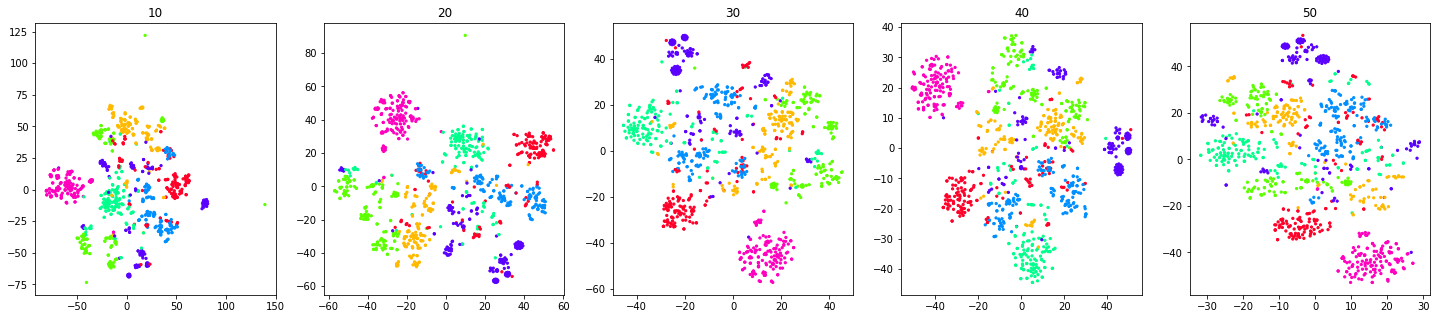

In [24]:
plt.figure(figsize = (25,5))
i = 0
for perpl in [10, 20, 30, 40, 50]:
    i+=1
    tsne = TSNE(n_components = 2, perplexity = perpl)
    X_tf_tsne = tsne.fit_transform(X_tfidf)
    
    plt.subplot(1,5,i)
    plt.scatter(X_tf_tsne[:,0], X_tf_tsne[:,1], c = categs_, cmap = 'gist_rainbow', s = 5)
    plt.title(perpl)
    
plt.show()

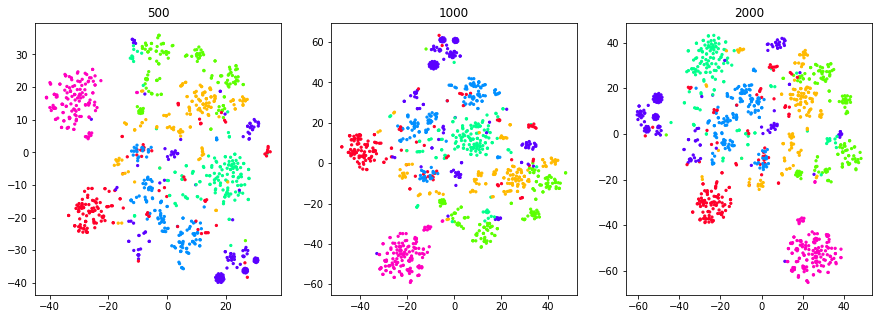

In [25]:
plt.figure(figsize = (15,5))
i = 0
for niter in [500, 1000, 2000]:
    i+=1
    tsne = TSNE(n_components = 2, n_iter = niter)
    X_tf_tsne = tsne.fit_transform(X_tfidf)
    
    plt.subplot(1,3,i)
    plt.scatter(X_tf_tsne[:,0], X_tf_tsne[:,1], c = categs_, cmap = 'gist_rainbow', s = 5)
    plt.title(niter)
    
plt.show()

# Naive Bayes classification

## Based on tf-idf

In [82]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data_clean['category'], test_size = 0.35)

# Traning
bernoulli = BernoulliNB()
bernoulli.fit(X_train, y_train)

# Prediction and scoring
y_bern_pred = bernoulli.predict(X_test) 
print(classification_report(y_test, y_bern_pred))
print(confusion_matrix(y_test, y_bern_pred))

                             precision    recall  f1-score   support

                 Baby Care        0.78      0.61      0.68        46
  Beauty and Personal Care        0.58      0.89      0.70        55
                 Computers        0.96      0.94      0.95        53
Home Decor & Festive Needs        0.95      0.66      0.78        56
           Home Furnishing        0.66      0.98      0.79        50
          Kitchen & Dining        1.00      0.60      0.75        50
                   Watches        1.00      0.90      0.95        58

                   accuracy                           0.80       368
                  macro avg       0.85      0.80      0.80       368
               weighted avg       0.85      0.80      0.80       368

[[28  8  0  0 10  0  0]
 [ 1 49  1  2  2  0  0]
 [ 0  3 50  0  0  0  0]
 [ 1  9  1 37  8  0  0]
 [ 1  0  0  0 49  0  0]
 [ 0 16  0  0  4 30  0]
 [ 5  0  0  0  1  0 52]]


In [83]:
# Finding main keywords per category
df_fi = pd.DataFrame(np.exp(bernoulli.feature_log_prob_), 
             index = bernoulli.classes_,
             columns = c_vect.get_feature_names()
            ).T

df_top = pd.DataFrame(columns = bernoulli.classes_)
for categ in df_fi.columns:
    s_ = df_fi[categ]
    df_top[categ] = s_.sort_values(ascending = False).head(10).index
    
df_top

,Baby Care,Beauty and Personal Care,Computers,Home Decor & Festive Needs,Home Furnishing,Kitchen & Dining,Watches
0,specif,rs,rs,rs,rs,rs,watch
1,ideal,product,free,price,product,price,rs
2,general,free,product,cm,free,product,india
3,babi,replac,replac,showpiec,buy,mug,genuin
4,cotton,day,guarante,product,ship,ceram,free
5,rs,buy,deliveri,free,flipkart,materi,onlin
6,fabric,ship,genuin,best,cash,day,replac
7,detail,deliveri,buy,buy,deliveri,design,com
8,pattern,genuin,day,day,com,gift,discount
9,packag,guarante,cash,replac,genuin,specif,great


In [84]:
# Training
from sklearn.naive_bayes import MultinomialNB
bernoulli = MultinomialNB()
bernoulli.fit(X_train, y_train)

# Prediction and scoring
y_bern_pred = bernoulli.predict(X_test) 
print(classification_report(y_test, y_bern_pred))
print(confusion_matrix(y_test, y_bern_pred))

                             precision    recall  f1-score   support

                 Baby Care        0.83      0.65      0.73        46
  Beauty and Personal Care        0.92      0.89      0.91        55
                 Computers        0.90      1.00      0.95        53
Home Decor & Festive Needs        0.91      0.95      0.93        56
           Home Furnishing        0.73      0.94      0.82        50
          Kitchen & Dining        1.00      0.82      0.90        50
                   Watches        1.00      0.98      0.99        58

                   accuracy                           0.90       368
                  macro avg       0.90      0.89      0.89       368
               weighted avg       0.90      0.90      0.90       368

[[30  2  0  4 10  0  0]
 [ 2 49  1  1  2  0  0]
 [ 0  0 53  0  0  0  0]
 [ 0  1  0 53  2  0  0]
 [ 3  0  0  0 47  0  0]
 [ 1  1  5  0  2 41  0]
 [ 0  0  0  0  1  0 57]]


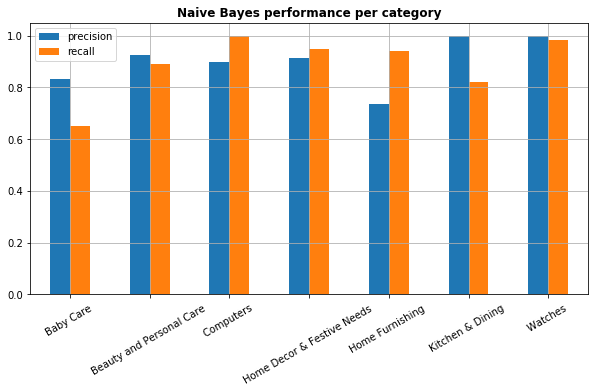

In [118]:
# Plotting scores
df_report = pd.DataFrame(classification_report(y_test, y_bern_pred, output_dict = True))
df_report.iloc[:2,:7].T.plot(kind = 'bar', figsize = (10,5), rot = 30)
plt.title('Naive Bayes performance per category', fontweight = 'bold')
plt.grid(True)
plt.show()

In [85]:
# Finding main keywords per category
df_fi = pd.DataFrame(np.exp(bernoulli.feature_log_prob_), 
             index = bernoulli.classes_,
             columns = c_vect.get_feature_names()
            ).T

df_top = pd.DataFrame(columns = bernoulli.classes_)
for categ in df_fi.columns:
    s_ = df_fi[categ]
    df_top[categ] = s_.sort_values(ascending = False).head(10).index
    
df_top

,Baby Care,Beauty and Personal Care,Computers,Home Decor & Festive Needs,Home Furnishing,Kitchen & Dining,Watches
0,babi,com,laptop,showpiec,com,mug,watch
1,girl,flipkart,replac,cm,flipkart,ceram,analog
2,detail,combo,com,best,cm,coffe,men
3,cotton,set,guarante,price,abstract,prithish,discount
4,fabric,guarante,flipkart,brass,buy,perfect,india
5,dress,replac,usb,onlin,cash,design,great
6,boy,onlin,day,inch,genuin,gift,women
7,sleev,day,free,wall,ship,one,dial
8,neck,cash,cash,guarante,deliveri,love,com
9,ideal,genuin,genuin,decor,doubl,rockmantra,onlin


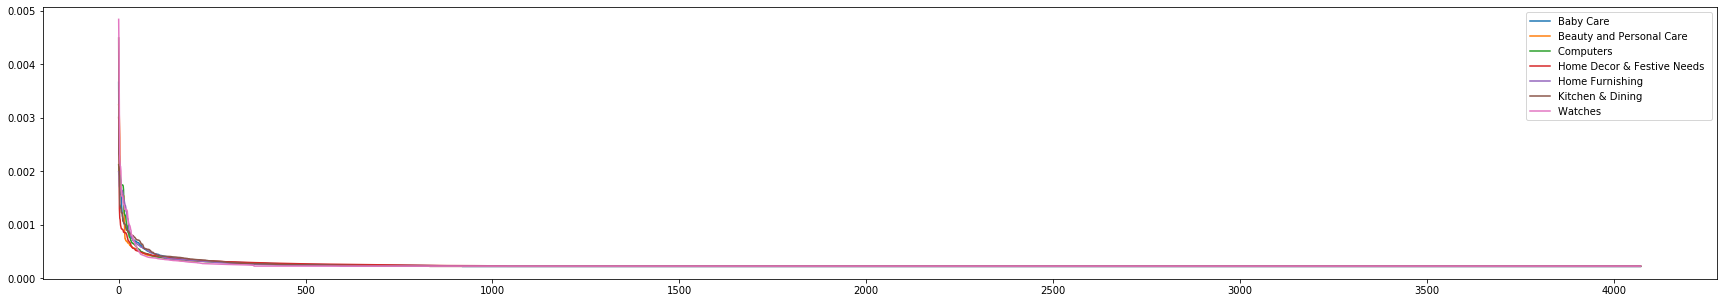

In [115]:
# 
plt.figure(figsize = (30,5))
for categ in df_fi.columns:
    plt.plot(range(df_fi.shape[0]), df_fi[categ].sort_values(ascending = False).values, label = categ)
    plt.legend()
plt.show()

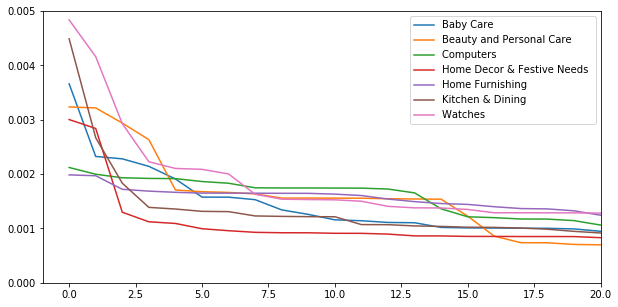

In [116]:
plt.figure(figsize = (10,5))
for categ in df_fi.columns:
    plt.plot(range(df_fi.shape[0]), df_fi[categ].sort_values(ascending = False).values, label = categ)
    plt.legend()
plt.xlim(-1,20)
plt.ylim(0,0.005)
plt.show()

In [127]:
np.exp(bernoulli.class_log_prior_)

array([0.15249267, 0.13929619, 0.14222874, 0.13782991, 0.14662757,
       0.14662757, 0.13489736])

In [145]:
s_ = pd.Series(X_test.toarray()[0], index = c_vect.get_feature_names())
print(s_[s_ != 0])
y_test.iloc[0]

best        0.075433
buy         0.046646
cash        0.047259
cm          0.157769
color       0.145431
day         0.049961
deliveri    0.047156
divin       0.383233
free        0.045701
genuin      0.047259
guarante    0.052503
hang        0.314494
krishna     0.359586
mdf         0.370219
onlin       0.058068
price       0.048417
product     0.042376
radha       0.383233
religi      0.335939
replac      0.051175
rs          0.033297
ship        0.047207
showpiec    0.193220
size        0.188380
wall        0.271868
dtype: float64


'Home Decor & Festive Needs '

In [150]:
bernoulli.predict_proba(X_test.toarray()[0].reshape(1, -1))

array([[0.0741327 , 0.10389353, 0.09596368, 0.47262293, 0.09940014,
        0.08254912, 0.07143789]])